<a href="https://colab.research.google.com/github/Wisley1/DataCon2023/blob/drug_descriptors/Hacaton1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install rdkit
!pip install klib
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import seaborn as sns
import matplotlib.pyplot as plt
import klib

In [12]:
df = pd.read_csv('/content/drug_descriptors.csv')
smiles_list = list(df['smiles'])

In [13]:
def get_name_descriptors():
    with open(file='/content/chosen_descriptors.txt', mode='r') as file:
        name_descriptors = file.readlines()
        name_descriptors = "".join(name_descriptors).split('\n')[0:len(name_descriptors)]
        return name_descriptors


name_descriptors = get_name_descriptors()

In [14]:
def get_descriptors(mol):
    calculator = Descriptors.CalcMolDescriptors(mol)
    value_descriptros = []
    for i in range(len(name_descriptors)):
        value_descriptros.append(calculator[name_descriptors[i]])
    return dict(zip(name_descriptors, value_descriptros))

In [15]:
def get_data_frame(df):
    df_final = df.copy()
    descriptors_values = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        dict_descriptors = get_descriptors(mol)
        descriptors_values.append([dict_descriptors[desc] for desc in name_descriptors])
    descriptors_df = pd.DataFrame(descriptors_values, columns=name_descriptors)
    df_final = pd.concat([df_final, descriptors_df], axis=1)
    return df_final

In [16]:
#get_data_frame(df).to_csv('smiles_descriptors.csv', index=False)

In [18]:
df_final = get_data_frame(df)

In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   drug                      44 non-null     object 
 1   chemID                    44 non-null     object 
 2   prefered_name             44 non-null     object 
 3   smiles                    44 non-null     object 
 4   EState_VSA9               44 non-null     float64
 5   VSA_EState1               44 non-null     float64
 6   VSA_EState10              44 non-null     float64
 7   VSA_EState2               44 non-null     float64
 8   VSA_EState3               44 non-null     float64
 9   VSA_EState4               44 non-null     float64
 10  VSA_EState5               44 non-null     float64
 11  VSA_EState6               44 non-null     float64
 12  VSA_EState7               44 non-null     float64
 13  VSA_EState8               44 non-null     float64
 14  VSA_EState9 

In [20]:
df_final = df_final.drop(columns=['Unnamed: 0'])
df_final.head()

,drug,chemID,prefered_name,smiles,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,Amoxicillin,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...,5.733667,-0.648105,1.353017,37.470093,20.864005,6.409240,...,6,4,9,4,0,2,2,3,0.0237,90.6937
1,Penicillin,CHEMBL1223,PENICILLIN G POTASSIUM,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,0.000000,-0.640806,1.383707,36.977240,13.688868,0.861709,...,5,1,8,4,0,2,2,3,-3.4699,83.1757
2,Vancomycin,CHEMBL262777,VANCOMYCIN,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,63.090392,38.297720,14.104061,116.810396,130.506871,8.003711,...,25,19,35,13,0,2,2,12,0.1062,349.2917
3,Gentamicin,CHEMBL463809,GENTAMICIN C1,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...,36.148454,23.720992,0.000000,0.000000,38.340014,17.507356,...,12,8,12,7,1,2,3,3,-3.3275,119.9310
4,Ceftazidime,CHEMBL44354,CEFTAZIDIME,CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=...,10.571256,1.781343,2.320045,59.634862,28.365059,3.830932,...,11,3,15,9,0,1,1,4,-1.2992,129.5559


In [33]:
klib.missingval_plot(df_final)

No missing values found in the dataset.


In [35]:
df_final.isna().sum().sum()

0

In [39]:
zero = (df_final == 0).sum()
zero

drug                         0
chemID                       0
prefered_name                0
smiles                       0
EState_VSA9                  7
VSA_EState1                  9
VSA_EState10                23
VSA_EState2                  2
VSA_EState3                  2
VSA_EState4                  2
VSA_EState5                  2
VSA_EState6                  5
VSA_EState7                  9
VSA_EState8                  2
VSA_EState9                 25
FractionCSP3                 0
HeavyAtomCount               0
NHOHCount                    0
NOCount                      0
NumAliphaticCarbocycles     34
NumAliphaticHeterocycles     8
NumAliphaticRings            4
NumAromaticCarbocycles      25
NumAromaticHeterocycles     27
NumAromaticRings            14
NumHAcceptors                0
NumHDonors                   0
NumHeteroatoms               0
NumRotatableBonds            0
NumSaturatedCarbocycles     37
NumSaturatedHeterocycles     8
NumSaturatedRings            7
RingCoun

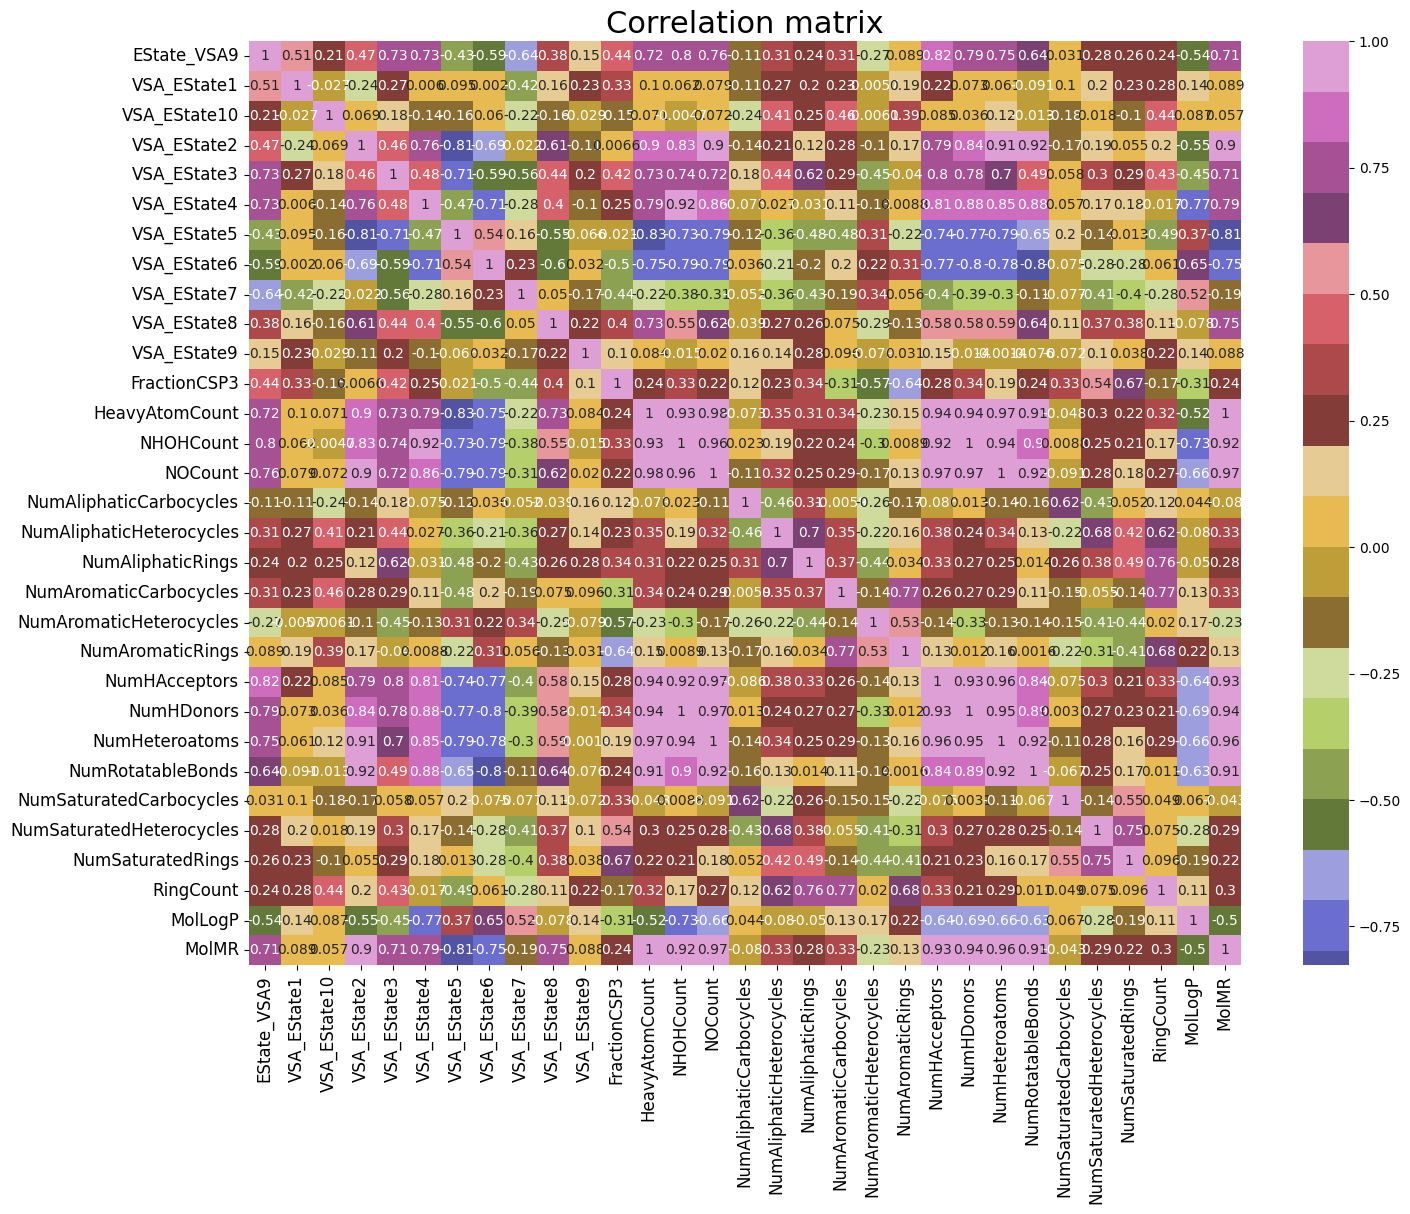

In [26]:
plt.figure(figsize=(16,12), dpi= 100)
sns.heatmap(df_final.drop(columns=['drug', 'chemID', 'prefered_name', 'smiles']).corr(),
            xticklabels=df_final.drop(columns=['drug', 'chemID', 'prefered_name', 'smiles']).corr(),
            yticklabels=df_final.drop(columns=['drug', 'chemID', 'prefered_name', 'smiles']).corr(), cmap='tab20b', center=0, annot=True)

plt.title('Correlation matrix', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
